In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import emoji
from nltk.tokenize.casual import TweetTokenizer
import re 
from xgboost import XGBClassifier as XGBoostClassifier
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### COVID

In [3]:
df = pd.read_csv("../../data/raw/datos.csv")
df.head(1)

,1,2,3,4,noticias
0,naranja,amarillo,amarillo,amarillo,en morelos imss reconvirtió 70 de camas hospi...


In [10]:
df["1"]

0        naranja
1       amarillo
2        naranja
3          verde
4           rojo
          ...   
1900       verde
1901     naranja
1902     naranja
1903     naranja
1904    amarillo
Name: 1, Length: 1905, dtype: object

In [11]:
X_train, X_test, y_train, y_test =train_test_split(df.loc[:,[ "noticias"]], df["1"], 
                                                    random_state=1, test_size=0.1, shuffle=True)

In [14]:
X_train_t, X_test = selection_representation(X_train["noticias"].tolist().copy(), X_test["noticias"].tolist().copy(), "TFIDF")

#X_train_t = std.fit_transform(X_train_t.toarray())
#X_test = std.transform(X_test.toarray())


param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in var_predictions:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)



KeyError: 'gender'

In [15]:
param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}

In [16]:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_t, y_train)
    print(model.score(X_train_t, y_train))
    print(confusion_matrix(model.predict(X_train_t), y_train))
    print(model.score(X_test, y_test))
    print(confusion_matrix(model.predict(X_test), y_test))

    #y_predict_evaluate[label] = model.predict(X_evaluate)

KeyboardInterrupt: 

In [27]:
dic_errors_spanish = {"momificacion": "bonificacion", "$$$": "$", "check in": "registrar entrada", "chek in": "registrar entrada", "check inn": "registrar entrada",
"check-in": "registrar entrada", "check out": "registrar salida", "check-out": "registrar salida", "a/c": "aire acondicionado", "c/u":"cada uno",
"t/s": " ", "7ª": "septima", "5ª": "quinta", "4ª": "cuarta", "3ª": "tercera",  "2ª": "segunda", "1ª": "primera", "1/2": "media", "4â°": "cuarto",
"3â°": "tercer", "2â°": "segundo", "1â°": "primer", "4°": "cuarto", "3°": "tercer", "2°": "segundo","1°": "primer", "1 er": "primer", "24/7": "todo el día",
"valet parking": "estacionamiento", "+": "", "calidad-precio": "calidad precio", "ubiera":"hubiera", "desyunar":"desayunar", "reñenar":"rellenar", 
"porfin":"por fin", "normalito":"normal", "hard rock":"musica", "samba":"baile", "mesclar":"mezclar", "=)":"feliz", "excellemt":"excelente", "tour":"viaje", "tours":"viaje",
"ciudadn":"ciudad", "wooowww": "excelente", "wow":"excelente", "grniales":"geniales"}

dict_emoji = { '🇪🇸':"españa", "🇪🇸":"españa", "🇪🇸":"españa",'👉':"", '🌹':"rosa",  '👇':"",  '✅': "listo", '🔴':"advertencia", '❤️':"amor",
 '👉🏻':"", '➡️':"flecha", '❌':"error",  '😂':"jajaja", '👏':"aplausos", '💪':"fuerza", '👇🏻':"", '💜':"amor", '😘':"besos",
 '🔵':"", '💪🏻':"fuerza",  '😉':"guiño", '🇪🇺':"Unión europea", '👇🏼':"", '🤣':"risas",  '🤔':"interesante", '👏🏻':"aplausos",
 '▶️':"advertencia", '👏🏼':"aplausos", '✔️':"cumplido", '✊':"apoyo", '😡':"enojado",'🗣':"comunicacion", '👇🏾':"", '📺':"television", '👉🏼':"", '💚':"amor",
 '👍':"me gusta", '😊':"feliz", '😳':"sorperder", '🙄':"interrogante", '🍊':"naranja", '👇🏽':"", '❤':"amor", 
 '🎥':"video",'🔹':"diamante", '🙏':"por favor",  '😍':"me encanta", '🎙':"microfono", '🏛️':"gobierno",  '🌈':"lgtbi",  '⛔':"negativo",  '❗':" ",
 '✨':"estrellas", '🖤':"amor", '📌':"nota", '🔺':" ", '📰':"periodico", '💪🏼':"fuerza", '👎🏻':"negativo", '🌍':"mundo",
 '😱':"sorpresa", '🌳':"naturaleza", '💙':"amor", '▶':"bandera roja", '♥️':"corazon", '🏥':"hospital", '❓':"?",
 '😜':"jajaja", '📹':"grabación", '📸':"camara", '📻':"radio", '🙏🏻':"por favor", '🐢':"tortuga", '🆘':"ayuda",
 '🔝':"top", '✔':"bien", '👑':"corona", '3️⃣':"3", '🤝':"felicitación", '🥀':"rosa", '😅':"jajaja", '1️⃣':"1",
 '📈':"tendencia", '⚠️':"advertencia", '✊🏽':"apoyo", '📽':"video", '2️⃣':"2", '😷':"cubrebocas",'💡':"idea",
 '📝':"tareas", '😭':"lorar", '🚜':"tractor", '✊🏻':"apoyo", '😔':"pena", '📚':"libros", '🙌🏻':"bravo", '🇪🇦':"españa",
 '👉🏽':"", '🥰':"me encanta", '🙈':"avergonzado", '🇮🇨':"pais", '⚽':"futbol", '🇻🇪':"colombia", '🦠':"virus", '🗓':"fecha",
 '🙏🏼':"por favor", '✈️':"avion", '✊🏼':"apoyo", '🚆':"auto", '🇵🇱':"pais", '📢':"anuncio", '4️⃣':"4", '🚨':"advertencia",
 '😢':"triste", '🛑':"advertencia", '📉':"tendencia", '🙌🏼':"bravo", '☺️':"feliz", '🎉':"fiesta", '🇬🇧':"reino unido", '⚖️':"balanza",
 '💶':"dinero", '⭕':"advertencia", 'ℹ️':"!", '🗣️':"comunicación", '📲':"telefono", '🤬':"grosero", '🇵🇹':"pais", '🧐':"interrogante",
 '🤗':"abrazo", '🟢':"cuidado", '🇺🇸':"estados unidos", '🤨':"interrogante", "🌈":"lgtbi"}

In [3]:
seed = 19970808
var_predictions = ["gender", "profession", "ideology_binary", "ideology_multiclass"]

col_text = "tweet"
path_train = "../../data/raw/training.csv"
# path_test = "../../test/development_test.csv"
path_evaluate = "../../data/evaluate/test_without_labels.csv"

In [4]:
train = pd.read_csv(path_train)
print(train.shape)

evaluate = pd.read_csv(path_evaluate)
print(evaluate.shape)


(37560, 6)
(12600, 3)


In [5]:
label_unique_train = train.label.unique()
print("Number uniques ", len(label_unique_train), "users in data trian.")
label_unique_evaluate = evaluate.label.unique()
print("Number uniques ", len(label_unique_evaluate), "users in data trian.")

Number uniques  313 users in data trian.
Number uniques  105 users in data trian.


In [6]:
sum([i in (label_unique_evaluate) for i in label_unique_train])

0

Por lo anterior, hay que considerar aun conjunto de datos de validación diferente. 
Vemos que el conjunto a evaluar no tiene ningún usuario repetido. 

[]

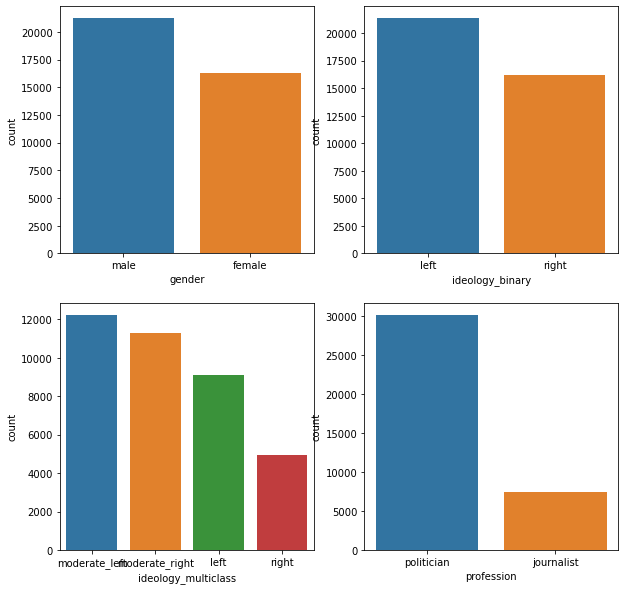

In [7]:
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
for i in range(int(len(var_predictions)/2)):
    sns.countplot(ax=axs[0,i], x=var_predictions[2*i], data=train)
    sns.countplot(ax=axs[1,i],x=var_predictions[2*i-1], data=train)
plt.plot()

### Preprocesamiento

- Todo en minusculas
- Selecionar hagstags
- Seleccionar emojis 
-  Caracteres raros y errores ortograficos:
  - ... .... !!!!! 
  - @user repetidos 
  - q
  - €, $, %
  
  - 2018-2019 -> 2018 a 2019

In [7]:
# np.random.seed(seed)
index_random = np.random.choice(range(1,train.shape[0]), 2)
for i in index_random:
    print(train.loc[i, "tweet"])

Pablo Casado se presenta para suceder a Rajoy. Hay malestar en un sector del [POLITICAL_PARTY] por la indecisión de Feijóo y temor a lo que haga Soraya. Se busca una tercera vía y Casado puede tener apoyos. Incluso Aznar volvería a votar al [POLITICAL_PARTY]...
Ante la invisibilización de la grave situación del trabajo jornalero, nos sumamos a las y los compañeros del @user en la defensa de los derechos de los jornaleros de Andalucía. La explotación laboral existente está favorecida por la dejación institucional y política.


##### Caracteres raros

In [8]:
train["tweet"] = train["tweet"].apply(lambda x: x.replace("C’s ", "ciudadanos politicos")\
    .replace("S.M. el Rey","Su Majestad el Rey ")\
    .replace("R. de Murcia","Región de Murcia ")\
    .replace("🇪🇸"," españa  "))

evaluate["tweet"] = evaluate["tweet"].apply(lambda x: x.replace("C’s ", "ciudadanos politicos")\
    .replace("S.M. el Rey","Su Majestad el Rey ")\
    .replace("R. de Murcia","Región de Murcia ")\
    .replace("🇪🇸"," españa  "))

In [9]:
train["tweet"] = train["tweet"].apply(lambda x: re.sub(r"(@user )\1{1,}", "@user ", x))
evaluate["tweet"] = evaluate["tweet"].apply(lambda x: re.sub(r"(@user )\1{1,}", "@user ", x))

#### Hastags

In [11]:
list_hashtags = []
for t in train["tweet"]:
    aux = re.findall(r"#(\w+)",  t)
    if len(aux)>0:
        for i in aux:
            i = i.lower()
            if i=="covid19": i="coronavirus"
            if i=="covid_19":i="coronavirus"
            if i=="covid": i="coronavirus"
            if i=="covid19esp": i="coronavirus"
            if i=="violenciadegénero": i="violenciadegénero"
            if i=="violenciamachista": i="violenciadegénero"
            list_hashtags.append(i)

In [12]:
count_hastags = dict(Counter(list_hashtags))
count_hastags = dict(sorted(count_hastags.items(), key=lambda item: item[1], reverse=True))
len(count_hastags)

5772

In [13]:
keys_hastags = list(count_hastags.keys())
values_hastags = list(count_hastags.values())
fil = sum(np.array(list(values_hastags))!=1)+1

keys_hastags = keys_hastags[:fil]
values_hastags = values_hastags[:fil]

In [14]:
keys_hastags = ["#"+hasg for hasg in keys_hastags]

In [15]:
keys_hastags

['#political_party',
 '#coronavirus',
 '#españa',
 '#andalucía',
 '#estevirusloparamosunidos',
 '#10n',
 '#28a',
 '#violenciadegénero',
 '#bilbao',
 '#ue',
 '#granada',
 '#portodoloquenosune',
 '#regióndemurcia',
 '#cyl',
 '#madrid',
 '#canarias',
 '#ahoratocalucharjuntos',
 '#igualdad',
 '#congreso',
 '#valorseguro',
 '#26m',
 '#ávila',
 '#pleno',
 '#covidー19',
 '#8m',
 '#laespañaquequieres',
 '#melilla',
 '#hazquepase',
 '#sesióndecontrol',
 '#pge2021',
 '#cmin',
 '#pac',
 '#cantabria',
 '#leonesp',
 '#enmarchatodosunidos',
 '#ahorasí',
 '#vigo',
 '#turismo',
 '#bastaya',
 '#eeuu',
 '#políticaútil',
 '#sevilla',
 '#pge',
 '#lgtbi',
 '#málaga',
 '#sánchez',
 '#libertad',
 '#eutanasia',
 '#galicia',
 '#pedrosánchez',
 '#pgedepaís2021',
 '#manipulaciónrtve',
 '#lugo',
 '#larioja',
 '#gobierno',
 '#europa',
 '#14f',
 '#4m',
 '#burgos',
 '#clm',
 '#castelló',
 '#sisepuede',
 '#marlaska',
 '#lomloe',
 '#murcia',
 '#25n',
 '#paro',
 '#pge2019',
 '#ahoraespaña',
 '#democracia',
 '#activemose

In [16]:
m=re.compile(r"#(\w+)")
train["tweet"][1]

'Sin normas dejaron que crecieran las VTC y Sin derechos dejaron a los trabajadores. Gobiernos [POLITICAL_PARTY] siguen sin regularlas, Madrid y Andalucía con 70% autorizaciones, viven en la alegalidad y el intrusismo al taxi. . 🗣️ Hoy en Comisión de #Transportes, #Movilidad y #AgendaUrbana'

In [17]:
t = TweetTokenizer()

In [19]:
list_hashtags = []
for t in train["tweet"]:
    t.lower()
    if len(aux)>0:
        for i in aux:
            i = i.lower()
            if i=="covid19": i="coronavirus"
            if i=="covid_19":i="coronavirus"
            if i=="covid": i="coronavirus"
            if i=="covid19esp": i="coronavirus"
            if i=="violenciadegénero": i="violenciadegénero"
            if i=="violenciamachista": i="violenciadegénero"
            list_hashtags.append(i)

#### emoji

In [10]:
list_emoji = []
count_emoji_i = []
for t in train["tweet"]:
    aux = emoji.emoji_list(t)
    count_emoji_i.append(len(aux))
    if len(aux)>0:
        for i in aux:
            list_emoji.append(i["emoji"])

In [11]:
count_emojis = dict(Counter(list_emoji))
count_emojis = dict(sorted(count_emojis.items(), key=lambda item: item[1], reverse=True))

In [12]:
percentil_emoji = np.cumsum(np.array(list(count_emojis.values())))/sum(count_emojis.values())
percentil_emoji_80 = percentil_emoji[percentil_emoji<.81]
number_emoji_percentil_80= len(percentil_emoji_80)

In [13]:
emojis_total = list(count_emojis.keys())
count_emojis_total = list(count_emojis.values())

emojis_percentil = emojis_total[0:number_emoji_percentil_80]
count_emojis_percentil = count_emojis_total[0:number_emoji_percentil_80]

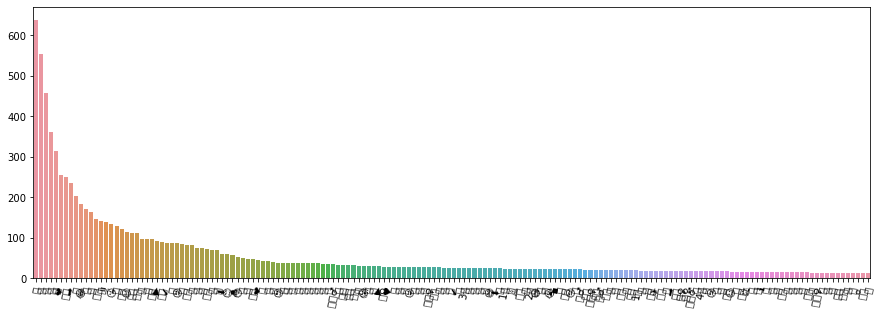

In [14]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=emojis_percentil, y=count_emojis_percentil)
plt.xticks(rotation=80)
plt.show()

In [15]:
new = []
for j in train["tweet"]:
    t = TweetTokenizer()
    temp = []
    j = j.lower()
    for word_errors in dic_errors_spanish:
        j = j.replace(word_errors, dic_errors_spanish[word_errors])

    palabras = t.tokenize(j)
    for pal in palabras:
        if (emoji.is_emoji(pal)):
            if (pal in dict_emoji.keys()):
                temp.append(dict_emoji[pal])
                temp.append(" ")
            else:
                temp.append("sticker_i")
                temp.append(" ")
        else:
            temp.append(pal)
            
    #print(temp)
    new.append(" ".join(temp))
train["tweet_emoji"] = new    

In [16]:
new = []
for j in evaluate["tweet"]:
    t = TweetTokenizer()
    temp = []
    j = j.lower()
    for word_errors in dic_errors_spanish:
        j = j.replace(word_errors, dic_errors_spanish[word_errors])

    palabras = t.tokenize(j)
    for pal in palabras:
        if (emoji.is_emoji(pal)):
            if (pal in dict_emoji.keys()):
                temp.append(dict_emoji[pal])
                temp.append(" ")
            else:
                temp.append("sticker_i")
                temp.append(" ")
        else:
            temp.append(pal)
            
    #print(temp)
    new.append(" ".join(temp))
evaluate["tweet_emoji"] = new    

In [17]:
# np.random.seed(seed)
# index_random = np.random.choice(range(1,train.shape[0]), 3)
for i in index_random:
    print(train.loc[i, "tweet_emoji"])

pablo casado se presenta para suceder a rajoy . hay malestar en un sector del [ political_party ] por la indecisión de feijóo y temor a lo que haga soraya . se busca una tercera vía y casado puede tener apoyos . incluso aznar volvería a votar al [ political_party ] ...
ante la invisibilización de la grave situación del trabajo jornalero , nos sumamos a las y los compañeros del @user en la defensa de los derechos de los jornaleros de andalucía . la explotación laboral existente está favorecida por la dejación institucional y política .


#### Acentos y puntuación


In [19]:
def quitarAcentos_singnos(texto):
    ans = ""
    for c in texto:
        if c == 'á': c = 'a'
        if c == 'é': c = 'e'
        if c == 'í': c = 'i'
        if c == 'ó': c = 'o'
        if c == 'ú': c = 'u'
        if c == 'Á': c = 'A'
        if c == 'É': c = 'E'
        if c == 'Í': c = 'I'
        if c == 'Ó': c = 'O'
        if c == 'Ú': c = 'U'
        if c == ",": c = ""
        if c== "." : c=" "
        if c== "!" : c=""
        if c=="?"  : c=""
        if c=="¿"  : c=""
        if c=="¡"  : c=""
        if c=='"' : c=""
        if c=="’" : c=""
        if c=="“" : c=""
        if c=="”": c=""
        if c=="'": c=""
        if c=="[": c=""
        if c=="]": c=""
        if c=="%": c="porcentaje"
        if c=="€": c="dinero"
        if c=="$": c="dinero"
        if c=="covid - 19": c="covid19"
        if c=="covide": c="covid"
        if c=="…": c=""
        if c==":": c=""
        if c=="-": c=""
        if c=="<": c=""
        if c==">":c=""
        if c=="/": c=""
        if c=="(":c=""
        if c==")":c=""
        if c=="*":c=""
        if c=="‘": c=""
        if c=="«": c=""
        if c=="»": c=""
        if c=="🇪 🇸": c="españa"
        if c==";": c=""
        ans += c
    return ans

In [20]:
train["tweet_emoji_signos"] = train["tweet_emoji"].apply(lambda x: quitarAcentos_singnos(x)) 
train["tweet_emoji_signos"] = train["tweet_emoji_signos"].apply(lambda x: re.sub(r"( )\1{1,}", " ",x))

evaluate["tweet_emoji_signos"] = evaluate["tweet_emoji"].apply(lambda x: quitarAcentos_singnos(x)) 
evaluate["tweet_emoji_signos"] = evaluate["tweet_emoji_signos"].apply(lambda x: re.sub(r"( )\1{1,}", " ",x))

In [21]:
# np.random.seed(seed)
index_random = np.random.choice(range(1,train.shape[0]), 20)
for i in index_random:
    print(train.loc[i, "tweet_emoji_signos"])

tras una decada de recortes hemos aumentado en casi un 60 porcentaje la financiacion de la idi es un hito historico que consolidaremos durante los proximos años esta subida de financiacion junto con la reforma de la #leyciencia nos pone en la senda de revertir los errores del pasado
españa ha realizado 48 millones de pruebas diagnosticas de #covid19 de las que mas de tres millones son pcr la capacidad diagnostica sigue aumentado y a dia de hoy a mas del 90 porcentaje de los casos sospechosos se les hace pcr con resultados en 48 horas #estevirusloparamosunidos
trabajo de equipo con @user en las partidas de #larioja #pge2021 ademas de asistencia a varias comisiones @user comparecencias sticker_i ️informar sobre temas relativos al proyecto de ley de presupuestos generales del estado para el año 2021 
ha sufrido acoso de su ex pareja su familia es reacia a acogerla durmio con su hijo en un coche e ingresa 836 dinero a maria la van a tirar a la calle el banco traspaso su domicilio a un fond

In [22]:
opinion_new = []
for j in train["tweet_emoji_signos"]:
    t = TweetTokenizer()
    temp = []
    palabras = t.tokenize(j)
    for pal in palabras:
                if pal=="am": temp.append("de la mañana ")
                elif pal=="pm": temp.append("de la tarde ")
                elif pal=="pvr": temp.append("viajar a puerto vallarta ")
                elif pal=="cellular": temp.append("celular ")
                elif pal=="suuuuper": temp.append("super ")
                elif pal=="relaxxx": temp.append("relajado ")
                elif pal=="p.m": temp.append("de la tarde ")
                elif pal=="srita":
                    temp.append("señorita ")
                elif pal=="sr":
                    temp.append("señor ")
                elif pal=="etc":
                    temp.append("etcetera ")
                elif pal=="hrs": temp.append("horas ")
                elif pal=="gto": temp.append("guanajuato ")
                elif pal=="min": temp.append("minutos ")
                elif pal=="dic": temp.append("diciembre ")
                elif pal=="ene": temp.append("enero ")
                elif pal=="feb": temp.append("febrero ") 
                elif pal=="march": temp.append("marzo")
                elif pal=="jun": temp.append("junio") 
                elif pal=="otel": temp.append("hotel ")
                elif pal=="cm": temp.append("centimetros ")
                elif pal=="gdl": temp.append("guadalajara ")
                elif pal=="k": temp.append("que ")
                elif pal=="filolononoooonn": temp.append("fila grande ")
                elif pal=="ok": temp.append("esta bien ")
                elif pal==":)": temp.append("bien ")
                elif pal=="ivamos": temp.append("ibamos ")
                elif pal=="wtc": temp.append("edificio ")
                elif pal=="km": temp.append("kilometro ")
                elif pal=="kms": temp.append("kilometros ")
                elif pal=="xq": temp.append("por que ")
                elif pal=="x": temp.append("por que ")
                elif pal=="prox": temp.append("aproximado")
                elif pal=="aprox": temp.append("aproximado")
                elif pal=="wtf": temp.append("que asqueroso")
                elif pal=="muuuy": temp.append("muy ")
                elif pal=="=": temp.append("igual a ")
                elif pal=="dllrs": temp.append("dolares")
                elif pal=="q": temp.append("que")
                else:
                    temp.append(quitarAcentos_singnos(pal).lower().replace("jajajaja", "jajaja")\
                           .replace("usd", "dolares")\
                           .replace("wi-fi","internet")\
                            .replace("wifi", "internet")\
                           .replace("%", "porciento"))
                    temp.append(" ")  
    opinion_new.append("".join(temp))

In [23]:
train["tweet_emoji_signos_pre"] = opinion_new

In [24]:
opinion_new = []
for j in evaluate["tweet_emoji_signos"]:
    t = TweetTokenizer()
    temp = []
    palabras = t.tokenize(j)
    for pal in palabras:
                if pal=="am": temp.append("de la mañana ")
                elif pal=="pm": temp.append("de la tarde ")
                elif pal=="pvr": temp.append("viajar a puerto vallarta ")
                elif pal=="cellular": temp.append("celular ")
                elif pal=="suuuuper": temp.append("super ")
                elif pal=="relaxxx": temp.append("relajado ")
                elif pal=="p.m": temp.append("de la tarde ")
                elif pal=="srita":
                    temp.append("señorita ")
                elif pal=="sr":
                    temp.append("señor ")
                elif pal=="etc":
                    temp.append("etcetera ")
                elif pal=="hrs": temp.append("horas ")
                elif pal=="gto": temp.append("guanajuato ")
                elif pal=="min": temp.append("minutos ")
                elif pal=="dic": temp.append("diciembre ")
                elif pal=="ene": temp.append("enero ")
                elif pal=="feb": temp.append("febrero ") 
                elif pal=="march": temp.append("marzo")
                elif pal=="jun": temp.append("junio") 
                elif pal=="otel": temp.append("hotel ")
                elif pal=="cm": temp.append("centimetros ")
                elif pal=="gdl": temp.append("guadalajara ")
                elif pal=="k": temp.append("que ")
                elif pal=="filolononoooonn": temp.append("fila grande ")
                elif pal=="ok": temp.append("esta bien ")
                elif pal==":)": temp.append("bien ")
                elif pal=="ivamos": temp.append("ibamos ")
                elif pal=="wtc": temp.append("edificio ")
                elif pal=="km": temp.append("kilometro ")
                elif pal=="kms": temp.append("kilometros ")
                elif pal=="xq": temp.append("por que ")
                elif pal=="x": temp.append("por que ")
                elif pal=="prox": temp.append("aproximado")
                elif pal=="aprox": temp.append("aproximado")
                elif pal=="wtf": temp.append("que asqueroso")
                elif pal=="muuuy": temp.append("muy ")
                elif pal=="=": temp.append("igual a ")
                elif pal=="dllrs": temp.append("dolares")
                elif pal=="q": temp.append("que")
                else:
                    temp.append(quitarAcentos_singnos(pal).lower().replace("jajajaja", "jajaja")\
                           .replace("usd", "dolares")\
                           .replace("wi-fi","internet")\
                            .replace("wifi", "internet")\
                           .replace("%", "porciento"))
                    temp.append(" ")  
    opinion_new.append("".join(temp))

In [25]:
evaluate["tweet_emoji_signos_pre"] = opinion_new

### Lematizar datos

In [35]:
import nltk

# nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.stem.snowball import SnowballStemmer
spanishStemm = SnowballStemmer("spanish").stem
import spacy
import es_core_news_sm
import en_core_web_sm
sp_es = spacy.load('es_core_news_sm')
sp_en = spacy.load('en_core_web_sm')
from nltk.corpus import stopwords

stopEnglish = set(stopwords.words('english'))
stopSpanish = set(stopwords.words('spanish'))


In [36]:
def lematiza(texto):
        temp = []
        doc = sp_es(texto)
        for token in doc:
            temp.append(token.lemma_)
            temp.append(" ")
        return "".join(temp)

def stemming(texto):
        palabras = word_tokenize(texto)
        temp = []
        for pal in palabras:
            temp.append(spanishStemm(pal))
            temp.append(" ")
        return "".join(temp)

In [40]:
train["tweet_emoji_signos_pre_lematiza"] = train["tweet_emoji_signos_pre"].apply(lambda x: lematiza(x))
evaluate["tweet_emoji_signos_pre_lematiza"] = evaluate["tweet_emoji_signos_pre"].apply(lambda x: lematiza(x))

In [39]:
lematiza("caminando jugando en la vida")

'caminar jugar en el vida '

### Feature extraction

### Representación del los datos

In [13]:
import sys
sys.path.append("../../src")
from my_functions import *
from preprocessing_data_model import format_data_origin 
from modeling_and_erros import *


2022-05-03 14:53:17.768512: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-03 14:53:17.768589: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
[nltk_data] Downloading package omw-1.4 to /home/enrique/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [25]:
train.head(2)

,label,gender,profession,ideology_binary,ideology_multiclass,tweet,tweet_emoji,tweet_emoji_signos
0,@user1,male,politician,left,moderate_left,¿ Quien miente [POLITICAL_PARTY] o ciudadanos ...,¿ quien miente [ political_party ] o ciudadano...,quien miente political_party o ciudadanos pol...
1,@user1,male,politician,left,moderate_left,Sin normas dejaron que crecieran las VTC y Sin...,sin normas dejaron que crecieran las vtc y sin...,sin normas dejaron que crecieran las vtc y sin...


In [42]:
train_resumen = train.groupby(["label","gender", "profession", "ideology_binary", "ideology_multiclass"], as_index = False).agg({'tweet': ' '.join,
                                                                                                                "tweet_emoji": " ".join, 
                                                                                                                 "tweet_emoji_signos":" ".join, 
                                                                                                                 "tweet_emoji_signos_pre":" ".join,
                                                                                                                 "tweet_emoji_signos_pre_lematiza":" ".join})


evaluate_resumen = evaluate.groupby(["label"], as_index = False).agg({'tweet': ' '.join,"tweet_emoji": " ".join, 
                                                                                                                 "tweet_emoji_signos":" ".join, 
                                                                                                                 "tweet_emoji_signos_pre":" ".join,
                                                                     "tweet_emoji_signos_pre_lematiza":" ".join})

In [43]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [42]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test = selection_representation(X_train["tweet"].tolist().copy(), X_test["tweet"].tolist().copy(), "TFIDF")

#X_train_t = std.fit_transform(X_train_t.toarray())
#X_test = std.transform(X_test.toarray())


param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in var_predictions:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)



1.0
[[105   0]
 [  0 146]]
0.6825396825396826
[[18  6]
 [14 25]]
1.0
[[ 52   0]
 [  0 199]]
0.9206349206349206
[[ 7  2]
 [ 3 51]]
1.0
[[140   0]
 [  0 111]]
0.9047619047619048
[[33  1]
 [ 5 24]]
1.0
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  0]
 [ 0  0  0 35]]
0.8253968253968254
[[14  1  0  2]
 [ 0 18  2  0]
 [ 1  3 16  1]
 [ 1  0  0  4]]


In [46]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")


param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in var_predictions:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)



1.0
[[105   0]
 [  0 146]]
0.6984126984126984
[[18  5]
 [14 26]]
1.0
[[ 52   0]
 [  0 199]]
0.9365079365079365
[[ 8  2]
 [ 2 51]]
1.0
[[140   0]
 [  0 111]]
0.9206349206349206
[[33  0]
 [ 5 25]]
1.0
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  0]
 [ 0  0  0 35]]
0.8253968253968254
[[14  1  0  2]
 [ 0 18  2  0]
 [ 0  3 16  1]
 [ 2  0  0  4]]


In [47]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre_lematiza"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre_lematiza"].tolist().copy(), X_test["tweet_emoji_signos_pre_lematiza"].tolist().copy(), "TFIDF")
X_train_t = std.fit_transform(X_train_t.toarray())
X_test = std.transform(X_test.toarray())

param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in var_predictions:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)

1.0
[[105   0]
 [  0 146]]
0.6190476190476191
[[13  5]
 [19 26]]
1.0
[[ 52   0]
 [  0 199]]
0.9206349206349206
[[ 7  2]
 [ 3 51]]
1.0
[[140   0]
 [  0 111]]
0.9365079365079365
[[35  1]
 [ 3 24]]
1.0
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  0]
 [ 0  0  0 35]]
0.8571428571428571
[[16  2  0  1]
 [ 0 17  1  0]
 [ 0  3 17  2]
 [ 0  0  0  4]]


In [307]:
def selection_representation(X_train=None, X_test=None, representation="TFIDF"):
    if representation=="TFIDF":
        vectorizer = TfidfVectorizer (
          analyzer = 'word',
          min_df = .1,
          max_features = 15000,
          lowercase = True#, stop_words=stopwords
        )
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
    elif representation=="Tokenizer_Keras":
        max_features = 15000  # number of words to consider as features
        max_len = 500  # cut texts after this number of words (among top max_features most common words)
        #prepara las secuencias
        tokenizer=Tokenizer(nb_words=max_features)
        tokenizer.fit_on_texts(X_train)
        sequencies_tr = tokenizer.texts_to_sequences(X_train)
        sequencies = tokenizer.texts_to_sequences(X_test)

        X_train = sequence.pad_sequences(sequencies_tr, maxlen=max_len)
        X_test = sequence.pad_sequences(sequencies, maxlen=max_len)
    else:
        print("Representación invalida")
        return 0     
    return X_train, X_test

In [308]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,["tweet_emoji_signos"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos"].tolist().copy(), X_test["tweet_emoji_signos"].tolist().copy(), "TFIDF")


param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in var_predictions:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)

1.0
[[105   0]
 [  0 146]]
0.6825396825396826
[[18  6]
 [14 25]]
1.0
[[ 52   0]
 [  0 199]]
0.9206349206349206
[[ 7  2]
 [ 3 51]]
1.0
[[140   0]
 [  0 111]]
0.9047619047619048
[[33  1]
 [ 5 24]]
1.0
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  0]
 [ 0  0  0 35]]
0.8253968253968254
[[14  1  0  2]
 [ 0 18  2  0]
 [ 1  3 16  1]
 [ 1  0  0  4]]


In [113]:
X_train, X_test, y_train, y_test = train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test_t = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
_, X_evaluate = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), evaluate_resumen["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")

X_train_t = std.fit_transform(X_train_t.toarray())
X_test = std.transform(X_test_t.toarray())
X_evaluate = std.transform(X_evaluate.toarray())
param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in ["profession"]:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    y_predict_evaluate[label] = model.predict(X_evaluate)

[01:33:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:33:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:33:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:34:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[01:33:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:33:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:33:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:34:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

1.0
[[ 52   0]
 [  0 199]]
0.9523809523809523
[[ 8  1]
 [ 2 52]]


In [114]:
y_predict_evaluate

{'profession': array(['politician', 'politician', 'politician', 'politician',
        'journalist', 'politician', 'politician', 'politician',
        'politician', 'journalist', 'politician', 'politician',
        'politician', 'politician', 'politician', 'journalist',
        'politician', 'politician', 'journalist', 'politician',
        'politician', 'politician', 'politician', 'politician',
        'politician', 'politician', 'politician', 'politician',
        'politician', 'politician', 'politician', 'politician',
        'politician', 'politician', 'politician', 'politician',
        'politician', 'politician', 'politician', 'politician',
        'politician', 'journalist', 'politician', 'politician',
        'politician', 'journalist', 'politician', 'politician',
        'politician', 'politician', 'politician', 'politician',
        'politician', 'journalist', 'politician', 'politician',
        'politician', 'politician', 'politician', 'politician',
        'journalist', 'pol

In [346]:
X_train, X_test, y_train, y_test = train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test_t = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
#_, X_evaluate = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), evaluate_resumen["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")



In [347]:
le = preprocessing.LabelEncoder()
y_train_ide = le.fit_transform(y_train["ideology_binary"])
y_test_ide = le.transform(y_test["ideology_binary"])
y_evaluate_ide = le.transform(evaluate_resumen["ideology_binary"])
#y_train["ideology_binary"]

In [127]:
X_train_new = np.array([np.concatenate([X_train_t.toarray()[i],[y_train_ide[i]]]) for i in range(251)])
X_test_new = np.array([np.concatenate([X_test_t.toarray()[i],[y_test_ide[i]]]) for i in range(63)])
X_evaluate_new = np.array([np.concatenate([X_evaluate.toarray()[i],[y_evaluate_ide[i]]]) for i in range(105)])

In [130]:
#X_train_t = std.fit_transform(X_train_t.toarray())
#X_test = std.transform(X_test_t.toarray())

param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in [var_predictions[3]]:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_new, y_train[label])
    print(model.score(X_train_new, y_train[label]))
    print(confusion_matrix(model.predict(X_train_new), y_train[label]))
    print(model.score(X_test_new, y_test[label]))
    print(confusion_matrix(model.predict(X_test_new), y_test[label]))

    y_predict_evaluate[label] = model.predict(X_evaluate_new)

1.0
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  0]
 [ 0  0  0 35]]
0.9365079365079365
[[15  1  0  0]
 [ 1 21  0  0]
 [ 0  0 18  2]
 [ 0  0  0  5]]


In [329]:
X_train, X_test, y_train, y_test = train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test_t = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")


X_train["count_mujer"] = [i.count("mujer") for i in X_train["tweet_emoji_signos_pre"]]
X_test["count_mujer"] = [i.count("mujer") for i in X_test["tweet_emoji_signos_pre"]]

In [361]:
np.array(X_train["count_mujer"])

array([12,  1,  7,  7,  5,  5, 30,  5, 19,  7,  3, 11, 11,  2,  7,  8,  9,
        1,  0,  1, 12,  2,  7,  4,  0,  9,  0, 12,  0,  5,  1, 17,  0,  1,
        3,  5,  6, 17,  2,  3,  2,  0,  1,  6,  3,  3,  3,  0,  5,  6,  6,
       37,  1,  4,  2,  1,  2,  2,  7,  0,  9,  0,  5, 15,  1,  4, 21,  3,
       12,  1,  0,  2,  4,  2,  2,  1,  2,  5,  0, 10,  1,  1,  2, 13,  6,
       25, 14,  1, 15,  7,  1,  4,  3,  0, 15,  9,  1,  0,  3,  4,  2,  1,
        8,  4,  6,  5,  5,  0,  6,  0, 10,  7,  8,  0,  0,  3,  4,  1, 17,
        4,  1,  5,  1,  0,  3,  1,  1,  4, 10,  1, 11,  4,  0,  4,  1,  4,
        4,  1,  8,  5,  0,  7,  1,  1,  1,  1, 10,  3,  3,  4, 14,  6,  2,
        5,  3,  0,  9,  2,  0,  0,  3,  8,  9,  1, 10, 15,  3,  5,  3,  4,
       11, 22,  1,  2,  7, 41, 13, 12,  7,  3,  0, 11,  3,  2,  4,  0,  0,
        1,  3,  8,  2,  4,  8,  8,  2,  3,  4,  3,  8, 19,  3,  2,  3,  3,
        3,  1,  3,  1, 12,  6, 12,  3,  4,  0,  5,  7,  3,  2,  0,  7,  2,
        6,  1,  1,  9, 53

In [356]:
X_train_t

<251x3188 sparse matrix of type '<class 'numpy.float64'>'
	with 231366 stored elements in Compressed Sparse Row format>

<AxesSubplot:xlabel='count_mujer', ylabel='Count'>

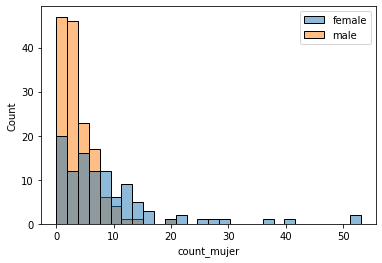

In [341]:
sns.histplot(x=X_train["count_mujer"], hue=y_train["gender"].tolist())

<AxesSubplot:ylabel='Count'>

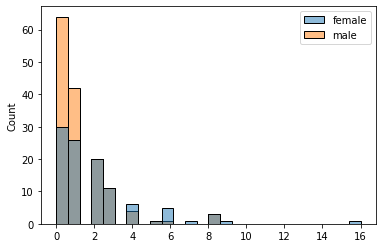

In [355]:
sns.histplot(x=[i.count("re") for i in X_train["tweet_emoji_signos_pre"]], hue=y_train["gender"].tolist())

# QDA

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import SVC # Support vector classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [177]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")

X_train_t = std.fit_transform(X_train_t.toarray())
X_test = std.transform(X_test.toarray())



parameters = [{'pca__n_components':[50,80,100,200]}]


#parameters = [{'pca__n_components':[50,80,100,200]}]
# Realiza Grid Search
#cvfolds = 4
#GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
#                  return_train_score=True, n_jobs=-1)
param_grid = {"store_covariance":[True,False]}
y_predict_evaluate = {}
for label in var_predictions:
    model =  Pipeline([('pca', PCA()), ('qda', QuadraticDiscriminantAnalysis(store_covariance=True))])
    model = GridSearchCV(model, cv=4, verbose=False, n_jobs=-1, param_grid=parameters)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analy

0.9083665338645418
[[ 86   4]
 [ 19 142]]
0.6031746031746031
[[11  4]
 [21 27]]


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analy

1.0
[[ 52   0]
 [  0 199]]
0.8412698412698413
[[ 0  0]
 [10 53]]


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.9960159362549801
[[140   1]
 [  0 110]]
0.8412698412698413
[[30  2]
 [ 8 23]]


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analy

0.9960159362549801
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  1]
 [ 0  0  0 34]]
0.7777777777777778
[[14  0  0  1]
 [ 1 18  1  0]
 [ 1  4 17  6]
 [ 0  0  0  0]]


# SVM

In [190]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre_lematiza"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre_lematiza"].tolist().copy(), X_test["tweet_emoji_signos_pre_lematiza"].tolist().copy(), "TFIDF")

X_train_t = std.fit_transform(X_train_t.toarray())
X_test = std.transform(X_test.toarray())


parameters = [
{'svc__C': [0.001, 0.01, 1], 'svc__kernel': ['linear'], 'pca__n_components':[50, 80, 200]},
    {'svc__C': [0.001, 0.01, 1], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10,100], 'svc__kernel': ['rbf'],
    'pca__n_components':[50, 80, 200]
    }]


y_predict_evaluate = {}
for label in var_predictions:
    #model = SVC(max_iter=400)
    pipe =  Pipeline([('pca', PCA()), ('svc', SVC(max_iter=1500))])
    model = GridSearchCV(pipe, param_grid=parameters, cv=4, verbose=False, n_jobs=-1)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))
    #y_predict_evaluate[label] = model.predict(X_evaluate)



/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/enrique/anaconda3/envs/automl/lib/

0.8167330677290837
[[ 73  14]
 [ 32 132]]
0.6349206349206349
[[13  4]
 [19 27]]
1.0
[[ 52   0]
 [  0 199]]
0.9365079365079365
[[ 9  3]
 [ 1 50]]


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/enrique/anaconda3/envs/automl/lib/

1.0
[[140   0]
 [  0 111]]
0.9365079365079365
[[34  0]
 [ 4 25]]


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


1.0
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  0]
 [ 0  0  0 35]]
0.8888888888888888
[[16  2  0  1]
 [ 0 17  0  0]
 [ 0  3 18  1]
 [ 0  0  0  5]]


#### XGboots

In [49]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre_lematiza"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre_lematiza"].tolist().copy(), X_test["tweet_emoji_signos_pre_lematiza"].tolist().copy(), "TFIDF")
# _, X_evaluate = selection_representation(X_train["tweet_emoji_signos_pre_lematiza"].tolist().copy(), evaluate_resumen["tweet_emoji_signos_pre_lematiza"].tolist().copy(), "TFIDF")
X_train_t = std.fit_transform(X_train_t.toarray())
X_test = std.transform(X_test.toarray())
#X_evaluate = std.transform(X_evaluate.toarray())
param_grid_xgboots =  {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

y_predict_evaluate = {}
for label in var_predictions:
    le = preprocessing.LabelEncoder()
    le.fit(y_train[label])
    y_train[label] = le.transform(y_train[label])
    y_test[label] = le.transform(y_test[label])
    if label in ['gender', 'profession', 'ideology_binary']:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=False, objective="binary:logistic")
    else:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=True, objective="mlogloss")
    model = GridSearchCV(model, param_grid=param_grid_xgboots, cv=3, verbose=True, n_jobs=10)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test,y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    # y_predict_evaluate[label] = le.inverse_transform(model.predict(X_evaluate))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[11:34:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[[105   0]
 [  0 146]]
0.7142857142857143
[[19  5]
 [13 26]]
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[11:35:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[[ 52   0]
 [  0 199]]
0.9206349206349206
[[ 7  2]
 [ 3 51]]
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[11:36:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. E

/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/

/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/

[11:39:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  0]
 [ 0  0  0 35]]
0.7777777777777778
[[13  1  0  2]
 [ 2 18  0  0]
 [ 0  3 16  3]
 [ 1  0  2  2]]
[11:30:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metr

[11:30:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:30:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:30:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:30:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [108]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
_, X_evaluate = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), evaluate_resumen["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
X_train_t = std.fit_transform(X_train_t.toarray())
X_test = std.transform(X_test.toarray())
X_evaluate = std.transform(X_evaluate.toarray())
param_grid_xgboots =  {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

y_predict_evaluate = {}
for label in ["gender", "ideology_binary"]:
    le = preprocessing.LabelEncoder()
    le.fit(y_train[label])
    y_train[label] = le.transform(y_train[label])
    y_test[label] = le.transform(y_test[label])
    if label in ['gender', 'profession', 'ideology_binary']:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=False, objective="binary:logistic")
    else:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=True, objective="mlogloss")
    model = GridSearchCV(model, param_grid=param_grid_xgboots, cv=3, verbose=True, n_jobs=10)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test,y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    y_predict_evaluate[label] = le.inverse_transform(model.predict(X_evaluate))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[01:40:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[[105   0]
 [  0 146]]
0.7936507936507936
[[24  5]
 [ 8 26]]
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[01:41:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[[140   0]
 [  0 111]]
0.9523809523809523
[[36  1]
 [ 2 24]]


In [109]:
for i in ["gender", "ideology_binary"]:
    evaluate_resumen[i] = y_predict_evaluate[i]

In [132]:
y_predict_evaluate["ideology_multiclass"]

array(['moderate_left', 'moderate_right', 'left', 'right', 'left', 'left',
       'left', 'moderate_right', 'moderate_left', 'moderate_left',
       'moderate_left', 'moderate_right', 'left', 'left', 'moderate_left',
       'moderate_left', 'moderate_right', 'moderate_right',
       'moderate_right', 'moderate_right', 'moderate_left', 'right',
       'moderate_left', 'moderate_left', 'left', 'moderate_left', 'left',
       'right', 'left', 'left', 'moderate_left', 'moderate_left', 'left',
       'moderate_right', 'moderate_left', 'left', 'right', 'right',
       'left', 'moderate_left', 'moderate_left', 'moderate_left', 'left',
       'moderate_left', 'moderate_right', 'left', 'moderate_right',
       'moderate_left', 'moderate_left', 'moderate_right', 'right',
       'moderate_right', 'left', 'left', 'right', 'moderate_right',
       'moderate_left', 'left', 'moderate_right', 'moderate_right',
       'moderate_right', 'moderate_right', 'moderate_right', 'right',
       'left', 'modera

In [133]:
evaluate_resumen["ideology_multiclass"] = y_predict_evaluate["ideology_multiclass"]
evaluate_resumen

,label,tweet,tweet_emoji,tweet_emoji_signos,tweet_emoji_signos_pre,gender,ideology_binary,profession,ideology_multiclass
0,@user101,@user En @user es inadmitida una proposición d...,@user en @user es inadmitida una proposición d...,@user en @user es inadmitida una proposicion d...,@user en @user es inadmitida una proposicion d...,male,left,politician,moderate_left
1,@user103,➡️El informe de las Cortes sobre la problemáti...,sticker_i ️el informe de las cortes sobre la...,sticker_i ️el informe de las cortes sobre la p...,sticker_i ️el informe de las cortes sobre la p...,male,right,politician,moderate_right
2,@user104,El acuerdo de gobierno incluye una consulta. D...,el acuerdo de gobierno incluye una consulta . ...,el acuerdo de gobierno incluye una consulta de...,el acuerdo de gobierno incluye una consulta de...,male,left,politician,left
3,@user11,Felicidades @user “El aborto no es una conquis...,felicidades @user “ el aborto no es una conqui...,felicidades @user el aborto no es una conquist...,felicidades @user el aborto no es una conquist...,female,right,politician,right
4,@user115,@user No estaban de capa caída ni mucho menos....,@user no estaban de capa caída ni mucho menos ...,@user no estaban de capa caida ni mucho menos ...,@user no estaban de capa caida ni mucho menos ...,male,left,journalist,left
...,...,...,...,...,...,...,...,...,...
100,@user63,Háganse el favor de seguir las crónicas de @us...,háganse el favor de seguir las crónicas de @us...,haganse el favor de seguir las cronicas de @us...,haganse el favor de seguir las cronicas de @us...,female,right,journalist,right
101,@user64,Almeida afirma que lleva dos años gobernando c...,almeida afirma que lleva dos años gobernando c...,almeida afirma que lleva dos años gobernando c...,almeida afirma que lleva dos años gobernando c...,male,left,journalist,left
102,@user65,"No sé si se ha dicho ya, pero lo digo yo. Uno ...","no sé si se ha dicho ya , pero lo digo yo . un...",no se si se ha dicho ya pero lo digo yo uno de...,no se si se ha dicho ya pero lo digo yo uno de...,male,left,journalist,left
103,@user67,"De nuevo, la ley para un final digno de la vid...","de nuevo , la ley para un final digno de la vi...",de nuevo la ley para un final digno de la vida...,de nuevo la ley para un final digno de la vida...,male,left,politician,left


In [117]:
evaluate_resumen["profession"] = y_predict_evaluate["profession"]
evaluate_resumen

,label,tweet,tweet_emoji,tweet_emoji_signos,tweet_emoji_signos_pre,gender,ideology_binary,profession
0,@user101,@user En @user es inadmitida una proposición d...,@user en @user es inadmitida una proposición d...,@user en @user es inadmitida una proposicion d...,@user en @user es inadmitida una proposicion d...,male,left,politician
1,@user103,➡️El informe de las Cortes sobre la problemáti...,sticker_i ️el informe de las cortes sobre la...,sticker_i ️el informe de las cortes sobre la p...,sticker_i ️el informe de las cortes sobre la p...,male,right,politician
2,@user104,El acuerdo de gobierno incluye una consulta. D...,el acuerdo de gobierno incluye una consulta . ...,el acuerdo de gobierno incluye una consulta de...,el acuerdo de gobierno incluye una consulta de...,male,left,politician
3,@user11,Felicidades @user “El aborto no es una conquis...,felicidades @user “ el aborto no es una conqui...,felicidades @user el aborto no es una conquist...,felicidades @user el aborto no es una conquist...,female,right,politician
4,@user115,@user No estaban de capa caída ni mucho menos....,@user no estaban de capa caída ni mucho menos ...,@user no estaban de capa caida ni mucho menos ...,@user no estaban de capa caida ni mucho menos ...,male,left,journalist
...,...,...,...,...,...,...,...,...
100,@user63,Háganse el favor de seguir las crónicas de @us...,háganse el favor de seguir las crónicas de @us...,haganse el favor de seguir las cronicas de @us...,haganse el favor de seguir las cronicas de @us...,female,right,journalist
101,@user64,Almeida afirma que lleva dos años gobernando c...,almeida afirma que lleva dos años gobernando c...,almeida afirma que lleva dos años gobernando c...,almeida afirma que lleva dos años gobernando c...,male,left,journalist
102,@user65,"No sé si se ha dicho ya, pero lo digo yo. Uno ...","no sé si se ha dicho ya , pero lo digo yo . un...",no se si se ha dicho ya pero lo digo yo uno de...,no se si se ha dicho ya pero lo digo yo uno de...,male,left,journalist
103,@user67,"De nuevo, la ley para un final digno de la vid...","de nuevo , la ley para un final digno de la vi...",de nuevo la ley para un final digno de la vida...,de nuevo la ley para un final digno de la vida...,male,left,politician


In [137]:
result_baseline = pd.read_csv("../../data/evaluate/results.csv")
result_baseline["match"] = result_baseline[["ideology_binary","ideology_multiclass"]].apply(lambda x: len(re.findall(x[0],x[1])),axis=1)
sum(result_baseline["match"]==0)

5

In [136]:
evaluate_resumen[["label"]+var_predictions].to_csv("../../data/evaluate/results_0105.csv", index=False)

In [84]:
y_predict_evaluate = {}
for label in [var_predictions[3]]:
    le = preprocessing.LabelEncoder()
    le.fit(y_train[label])
    y_train[label] = le.transform(y_train[label])
    y_test[label] = le.transform(y_test[label])
    if label in ['gender', 'profession', 'ideology_binary']:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=False, objective="binary:logistic")
    else:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=True, objective="mlogloss")
    model = GridSearchCV(model, param_grid=param_grid_xgboots, cv=3, verbose=True, n_jobs=10)
    model.fit(X_train_new, y_train[label])
    print(model.score(X_train_new, y_train[label]))
    print(confusion_matrix(model.predict(X_train_new), y_train[label]))
    print(model.score(X_test_new,y_test[label]))
    print(confusion_matrix(model.predict(X_test_new), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be remove

/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/

/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/

[01:25:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  0]
 [ 0  0  0 35]]
0.873015873015873
[[14  1  0  0]
 [ 2 21  0  0]
 [ 0  0 18  5]
 [ 0  0  0  2]]


# Feature engeniering
Variables a explorar: 
- Número de caracteres totales y promedio
- Número de palabras totales y promedio
- Número de emojis totales y promedio
- Número de palabras distintas

In [83]:
caracteres_with_signos = []
caracteres = []
palabras_with_singos = []
palabras = []
palabras_diferentes = []
emojis = []
emojis_diferentes = []
t = TweetTokenizer()
for i in train["tweet"]:
    caracteres_with_signos.append(len(i))
    caracteres.append(len(quitarAcentos_singnos(i).replace(" ", "")))
    word = t.tokenize(i)
    palabras_with_singos.append(len(word))
    word = t.tokenize(quitarAcentos_singnos(i))
    palabras.append(len(word))
    palabras_diferentes.append(len(set(word)))
    
    aux = emoji.emoji_lis(i)
    emojis.append(len(aux))
    
    emojis_diferentes.append(len(set([e["emoji"] for e in aux])))
    

In [86]:
new_variables = ["caracteres_with_signos", "caracteres", "palabras_with_singos", "palabras",
"palbras_diferentes", "emojis", "emojis_diferentes"]
dic_variables = [caracteres_with_signos, caracteres, palabras_with_singos, palabras,
                palabras_diferentes, emojis, emojis_diferentes]

In [87]:
for name, var in zip(new_variables, dic_variables):
    train[name] = var

In [96]:
?sns.pairplot

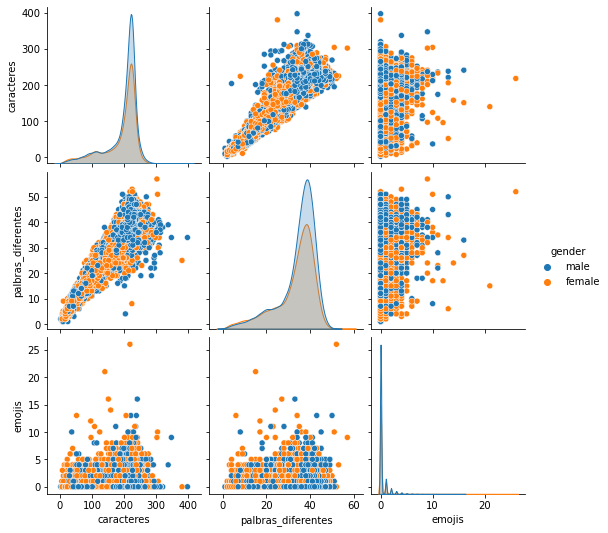

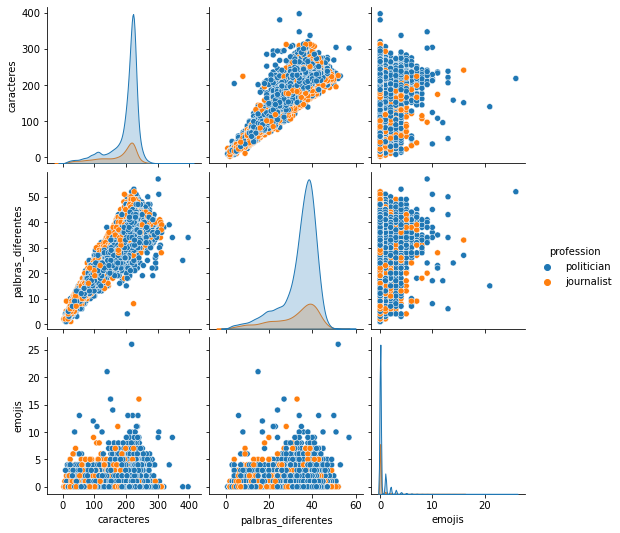

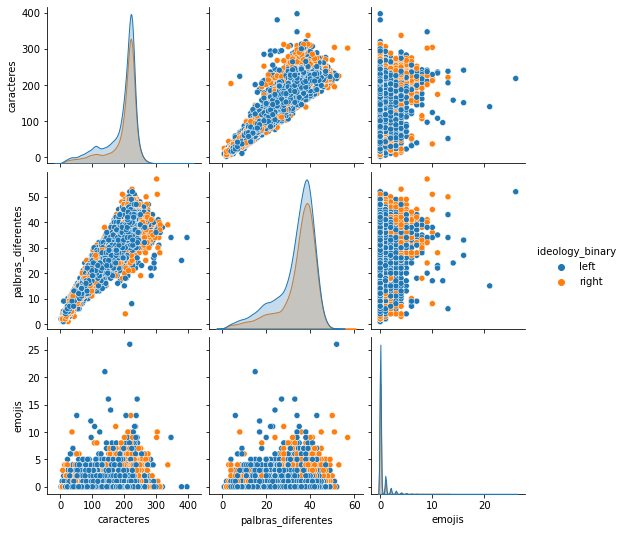

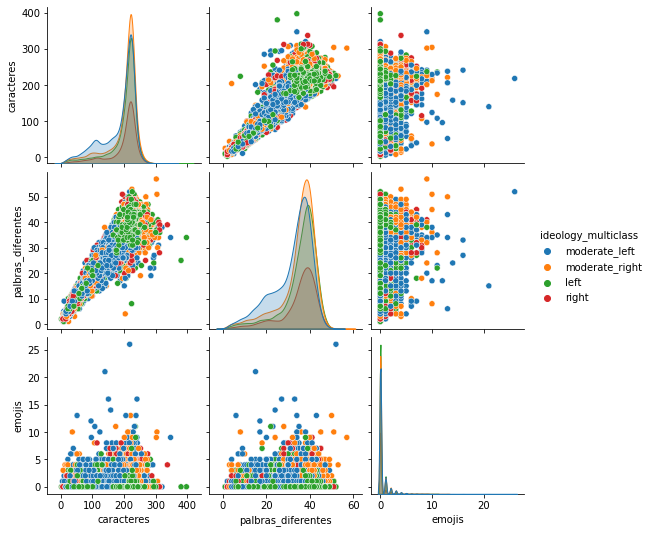

In [101]:
for i in var_predictions:
    sns.pairplot(data=train[[i]+["caracteres", "palbras_diferentes", "emojis"]], hue=i)
    plt.show()

In [103]:
new_variables

['caracteres_with_signos',
 'caracteres',
 'palabras_with_singos',
 'palabras',
 'palbras_diferentes',
 'emojis',
 'emojis_diferentes']

In [153]:
train_feature = train.groupby(["label", "gender", "profession", "ideology_binary", "ideology_multiclass"], as_index=False)\
.agg(total_caracteres_with_signos = ('caracteres_with_signos', 'sum'),
                                            mean_caracteres_with_signos = ("caracteres_with_signos", "mean"),
                                            total_caracteres=('caracteres', 'sum'),
                                            mean_caracteres = ("caracteres", "mean"),
                                            total_palabras_with_singos = ('palabras_with_singos', 'sum'),
                                            mean_palabras_with_singos = ("palabras_with_singos", "mean"),
                                            total_palabras = ('palabras', 'sum'),
                                            mean_palabras = ("palabras", "mean"),
                                            total_palbras_diferentes = ('palbras_diferentes', 'sum'),
                                            mean_palbras_diferentes = ("palbras_diferentes", "mean"),
                                            total_emojis = ('emojis', 'sum'),
                                            mean_emojis= ("emojis", "mean"),
                                            total_emojis_diferentes = ('emojis_diferentes', 'sum'),
                                            mean_emojis_diferentes = ("emojis_diferentes", "mean"))
train_feature.drop(columns=["label", "gender", "profession", "ideology_binary", "ideology_multiclass"],inplace=True)

In [149]:
train_resumen = train.groupby(["label","gender", "profession", "ideology_binary", "ideology_multiclass"], as_index = False).agg({'tweet': ' '.join,
                                                                                                                "tweet_emoji": " ".join, 
                                                                                                                 "tweet_emoji_signos":" ".join, 
                                                                                                                 "tweet_emoji_signos_pre":" ".join,
                                                                                                                 "tweet_emoji_signos_pre_lematiza":" ".join})

print(train_resumen.shape)
#train_resumen = pd.merge(train_resumen, train_feature, on=["label","gender", "profession", "ideology_binary", "ideology_multiclass"])
print(train_resumen.shape)
evaluate_resumen = evaluate.groupby(["label"], as_index = False).agg({'tweet': ' '.join,"tweet_emoji": " ".join, 
                                                                                                                 "tweet_emoji_signos":" ".join, 
                                                                                                                 "tweet_emoji_signos_pre":" ".join,
                                                                     "tweet_emoji_signos_pre_lematiza":" ".join})

(314, 10)
(314, 10)


In [161]:
X_train, X_test, y_train, y_test, X_train_fe, X_test_fe = train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], train_feature,
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test_t = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
#_, X_evaluate = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), evaluate_resumen["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
X_train_fe = np.array(X_train_fe)
X_test_fe = np.array(X_test_fe)


In [163]:
X_train_new = np.array([np.concatenate([X_train_t.toarray()[i],X_train_fe[i]]) for i in range(X_train.shape[0])])
X_test_new = np.array([np.concatenate([X_test_t.toarray()[i],X_test_fe[i]]) for i in range(X_test.shape[0])])
#X_evaluate_new = np.array([np.concatenate([X_evaluate.toarray()[i],[y_evaluate_ide[i]]]) for i in range(105)])

In [165]:
X_train_t.shape

(251, 3188)

In [164]:
X_train_new.shape

(251, 3202)

In [169]:
X_train_new = std.fit_transform(X_train_new)
X_test_new = std.transform(X_test_new)
# X_evaluate = std.transform(X_evaluate.toarray())

In [170]:
param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in var_predictions:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_new, y_train[label])
    print(model.score(X_train_new, y_train[label]))
    print(confusion_matrix(model.predict(X_train_new), y_train[label]))
    print(model.score(X_test_new, y_test[label]))
    print(confusion_matrix(model.predict(X_test_new), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)

1.0
[[105   0]
 [  0 146]]
0.6190476190476191
[[14  6]
 [18 25]]
1.0
[[ 52   0]
 [  0 199]]
0.9365079365079365
[[ 8  2]
 [ 2 51]]
1.0
[[140   0]
 [  0 111]]
0.9206349206349206
[[34  1]
 [ 4 24]]
1.0
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  0]
 [ 0  0  0 35]]
0.8571428571428571
[[16  3  0  2]
 [ 0 15  0  0]
 [ 0  4 18  0]
 [ 0  0  0  5]]


In [167]:
param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in var_predictions:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_new, y_train[label])
    print(model.score(X_train_new, y_train[label]))
    print(confusion_matrix(model.predict(X_train_new), y_train[label]))
    print(model.score(X_test_new, y_test[label]))
    print(confusion_matrix(model.predict(X_test_new), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)

0.6254980079681275
[[ 32  21]
 [ 73 125]]
0.5873015873015873
[[12  6]
 [20 25]]
0.896414342629482
[[ 35   9]
 [ 17 190]]
0.8888888888888888
[[ 4  1]
 [ 6 52]]
0.6095617529880478
[[113  71]
 [ 27  40]]
0.49206349206349204
[[29 23]
 [ 9  2]]


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

KeyboardInterrupt: 

In [171]:
y_predict_evaluate = {}
for label in var_predictions:
    le = preprocessing.LabelEncoder()
    le.fit(y_train[label])
    y_train[label] = le.transform(y_train[label])
    y_test[label] = le.transform(y_test[label])
    if label in ['gender', 'profession', 'ideology_binary']:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=False, objective="binary:logistic")
    else:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=True, objective="mlogloss")
    model = GridSearchCV(model, param_grid=param_grid_xgboots, cv=3, verbose=True, n_jobs=10)
    model.fit(X_train_new, y_train[label])
    print(model.score(X_train_new, y_train[label]))
    print(confusion_matrix(model.predict(X_train_new), y_train[label]))
    print(model.score(X_test_new,y_test[label]))
    print(confusion_matrix(model.predict(X_test_new), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be remove

[13:04:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[[105   0]
 [  0 146]]
0.7619047619047619
[[22  5]
 [10 26]]
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[13:05:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[[ 52   0]
 [  0 199]]
0.9206349206349206
[[ 7  2]
 [ 3 51]]
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[13:07:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/

/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/

[13:10:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  0]
 [ 0  0  0 35]]
0.746031746031746
[[14  2  0  2]
 [ 0 16  3  0]
 [ 1  3 14  2]
 [ 1  1  1  3]]
[13:03:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metri

[13:03:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[13:03:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[13:03:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### Modelos condicionales

In [273]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,["tweet_emoji_signos"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos"].tolist().copy(), X_test["tweet_emoji_signos"].tolist().copy(), "TFIDF")


param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in var_predictions:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)

1.0
[[105   0]
 [  0 146]]
0.6825396825396826
[[18  6]
 [14 25]]
1.0
[[ 52   0]
 [  0 199]]
0.9206349206349206
[[ 7  2]
 [ 3 51]]
1.0
[[140   0]
 [  0 111]]
0.9047619047619048
[[33  1]
 [ 5 24]]
1.0
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  0]
 [ 0  0  0 35]]
0.8253968253968254
[[14  1  0  2]
 [ 0 18  2  0]
 [ 1  3 16  1]
 [ 1  0  0  4]]


In [290]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
_, X_evaluate = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), evaluate_resumen["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
X_train_t = std.fit_transform(X_train_t.toarray())
X_test = std.transform(X_test.toarray())
X_evaluate = std.transform(X_evaluate.toarray())
param_grid_xgboots =  {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

y_predict_evaluate = {}
for label in ["ideology_binary"]:
    le = preprocessing.LabelEncoder()
    le.fit(y_train[label])
    y_train[label] = le.transform(y_train[label])
    y_test[label] = le.transform(y_test[label])
    if label in ['gender', 'profession', 'ideology_binary']:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=False, objective="binary:logistic")
    else:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=True, objective="mlogloss")
    model = GridSearchCV(model, param_grid=param_grid_xgboots, cv=3, verbose=True, n_jobs=10)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test,y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    y_predict_evaluate[label] = le.inverse_transform(model.predict(X_evaluate))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be remove

[17:34:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[[140   0]
 [  0 111]]
0.9523809523809523
[[36  1]
 [ 2 24]]


profession -> ideology -> ideology_multiclass -> gender
ideology -> profession -> ideology_multiclass -> gender

In [293]:
y_profession_train = model.predict(X_train_t)
y_profession_test = model.predict(X_test)

In [325]:
y_profession_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1])

In [326]:
y_profession_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0])

[17:47:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[17:33:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [322]:
le = preprocessing.LabelEncoder()
le.fit(y_train["ideology_binary"])
y_train_ide = le.transform(y_profession_train)
y_test_ide = le.transform(y_profession_test)
#y_evaluate_ide = le.transform(evaluate_resumen["ideology_binary"])
#y_ideology_test

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [357]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
_, X_evaluate = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), evaluate_resumen["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
X_train_t = std.fit_transform(X_train_t.toarray())
X_test = std.transform(X_test.toarray())
# y_train_ide = le.fit_transform(y_train["ideology_binary"].tolist())
# X_train_t = np.array([np.concatenate([X_train_t[i],[y_train_ide[i]]]) for i in range(X_train.shape[0])])
# X_test = np.array([np.concatenate([X_test[i],[y_test_ide[i]]]) for i in range(X_test.shape[0])])


X_evaluate = std.transform(X_evaluate.toarray())
param_grid_xgboots =  {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

y_predict_evaluate = {}
for label in ["ideology_binary", "gender"]:
    le = preprocessing.LabelEncoder()
    le.fit(y_train[label])
    y_train[label] = le.transform(y_train[label])
    y_test[label] = le.transform(y_test[label])
    if label in ['gender', 'profession', 'ideology_binary']:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=False, objective="binary:logistic")
    else:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=True, objective="mlogloss")
    model = GridSearchCV(model, param_grid=param_grid_xgboots, cv=3, verbose=True, n_jobs=10)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test,y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    y_predict_evaluate[label] = le.inverse_transform(model.predict(X_evaluate))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[19:15:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[[140   0]
 [  0 111]]
0.9523809523809523
[[36  1]
 [ 2 24]]
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[19:16:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[[105   0]
 [  0 146]]
0.7936507936507936
[[24  5]
 [ 8 26]]


In [337]:
X_evaluate

array([[-0.80755062, -0.96600109, -0.69740998, ..., -0.27705759,
        -0.48993601,  3.16010563],
       [-0.55195934, -0.96600109, -0.69740998, ...,  1.49819733,
        -0.48993601, -0.36960306],
       [ 0.32977806, -0.96600109,  2.13800464, ..., -0.27705759,
        -0.48993601,  0.99101665],
       ...,
       [-0.17283638,  1.19240469,  0.70914367, ..., -0.27705759,
         1.41700048,  5.70501526],
       [-0.60012237,  0.09206797,  0.68159939, ..., -0.27705759,
        -0.48993601, -0.36960306],
       [ 1.05114648,  0.81168882, -0.69740998, ..., -0.27705759,
        -0.48993601, -0.36960306]])

In [353]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,["tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
_, X_evaluate = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), evaluate_resumen["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")

X_train_t = std.fit_transform(X_train_t.toarray())
X_test = std.transform(X_test.toarray())
#X_evaluate = std.transform(X_evaluate.toarray())
#X_train_new = np.array([np.concatenate([X_train_t[i],[y_train_ide[i]]]) for i in range(X_train.shape[0])])

#X_test_new = np.array([np.concatenate([X_test[i],[y_test_ide[i]]]) for i in range(X_test.shape[0])])
#X_evaluate_new = np.array([np.concatenate([X_evaluate.toarray()[i],[y_evaluate_ide[i]]]) for i in range(105)])

param_grid_reg = [
    {"C": np.logspace(-3, 5, 20),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in var_predictions:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    y_predict_evaluate[label] = model.predict(X_evaluate)

1.0
[[105   0]
 [  0 146]]
0.6349206349206349
[[13  4]
 [19 27]]
1.0
[[ 52   0]
 [  0 199]]
0.9523809523809523
[[ 8  1]
 [ 2 52]]
1.0
[[140   0]
 [  0 111]]
0.9206349206349206
[[34  1]
 [ 4 24]]
1.0
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  0]
 [ 0  0  0 35]]
0.8571428571428571
[[16  3  0  2]
 [ 0 15  0  0]
 [ 0  4 18  0]
 [ 0  0  0  5]]


In [351]:
# 0.8571
evaluate_resumen["ideology_multiclass"] = y_predict_evaluate["ideology_multiclass"]

In [342]:
# score 0.93
evaluate_resumen["profession"] = y_predict_evaluate["profession"]

In [359]:
for i in ["ideology_binary", "gender"]:
    evaluate_resumen[i] = y_predict_evaluate[i]

In [362]:
evaluate_resumen[["label"]+var_predictions].to_csv("../../data/evaluate/results_0205.csv", index=False)

[19:07:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:08:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:09:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:11:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old

In [363]:
evaluate_last = pd.read_csv("../../data/evaluate/result_history/results_2304.csv")

In [365]:
evaluate_resumen = evaluate_resumen[["label"]+var_predictions]

In [375]:
evaluate_resumen.head(1)

,label,gender,profession,ideology_binary,ideology_multiclass
0,@user101,male,politician,left,moderate_left


In [394]:
evaluate_resumen["ideology_binary"] = evaluate_last["ideology_binary"]
evaluate_resumen.to_csv("../../data/evaluate/results_0205_emsable2.csv", index=False)

In [376]:
new_evaluate = pd.merge([["label"]+["gender", "profession", "ideology_multiclass"]], evaluate_resumen[["label", "ideology_binary"]], on="label")

In [378]:
#confusion_matrix(new_evaluate["ideology_binary_x"], new_evaluate["ideology_binary_y"])

In [381]:
new_evaluate["match"] = new_evaluate[["ideology_binary","ideology_multiclass"]].apply(lambda x: len(re.findall(x[0],x[1])),axis=1)


In [385]:
new_evaluate[["label"]+var_predictions].to_csv("../../data/evaluate/results_0205_emsable.csv", index=False)

In [391]:
evaluate_last.head(1)

,label,gender,profession,ideology_binary,ideology_multiclass
0,@user101,female,politician,left,moderate_left


In [390]:
new_evaluate[["label"]+var_predictions]

,label,gender,profession,ideology_binary,ideology_multiclass
0,@user101,female,politician,left,moderate_left
1,@user103,male,politician,right,moderate_right
2,@user104,male,politician,left,left
3,@user11,female,politician,right,right
4,@user115,female,journalist,left,left
...,...,...,...,...,...
100,@user63,male,journalist,right,left
101,@user64,male,politician,left,left
102,@user65,male,journalist,left,left
103,@user67,male,politician,left,left


In [383]:
new_evaluate[new_evaluate.match==0]

,label,gender,profession,ideology_multiclass,ideology_binary,match
24,@user197,male,politician,moderate_right,left,0
42,@user254,male,politician,right,left,0
51,@user308,male,politician,moderate_left,right,0
66,@user378,female,politician,moderate_right,left,0
84,@user446,female,journalist,left,right,0
89,@user458,female,journalist,moderate_left,right,0
95,@user50,male,politician,moderate_left,right,0
100,@user63,male,journalist,left,right,0


In [379]:
new_evaluate[["ideology_binary", "ideology_multiclass"]].apply(lambda x: x[0].)

,label,gender,profession,ideology_multiclass,ideology_binary
0,@user101,female,politician,moderate_left,left
1,@user103,male,politician,moderate_right,right
2,@user104,male,politician,left,left
3,@user11,female,politician,right,right
4,@user115,female,journalist,left,left
...,...,...,...,...,...
100,@user63,male,journalist,left,right
101,@user64,male,politician,left,left
102,@user65,male,journalist,left,left
103,@user67,male,politician,left,left


In [372]:
ne= new_evaluate[["ideology_binary_x", "ideology_binary_y"]].apply(lambda x: x[0]==x[1], axis=1)

0       True
1       True
2       True
3       True
4       True
       ...  
100    False
101     True
102     True
103     True
104    False
Length: 105, dtype: bool

In [404]:
final = pd.read_csv("../../data/evaluate/results_gp.csv")
final.drop(columns={"ideology_binary", "ideology_multiclass"},inplace=True)
final.head(1)

,label,gender,profession
0,@user101,male,politician


In [401]:
final_ide = pd.read_csv("../../data/evaluate/results.csv")
final_ide.drop(columns={"gender", "profession"},inplace=True)
final_ide.head()

,label,ideology_binary,ideology_multiclass
0,@user101,left,moderate_left
1,@user103,right,moderate_right
2,@user104,left,left
3,@user11,right,right
4,@user115,left,left


In [406]:
pd.merge(final, final_ide, on="label").to_csv("../../data/evaluate/results.csv", index=False)

### BoW

In [197]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,2), binary=False, max_features=6000)
#X = vectorizer.fit_transform(corpus_prep22)

In [194]:
X_train["tweet_emoji_signos_pre"]

33     a los clasicos insultos de los haters de twitt...
238    @user no es que los ertes computen como paro e...
228    hoy puesta en comun de inicio de curso escolar...
103    casado ha dicho que @user es un presidente ile...
70     @user la primera de las grandes transformacion...
                             ...                        
41     han perdido el norte traen a uno de su cuerda ...
256    recordais a political_party political_party y ...
199    #diadeeuropa la pandemia es una oportunidad pa...
15     este pedazo tio quetengo junto a mi es tonejo ...
81     el ministro de cultura y deporte es iceta la a...
Name: tweet_emoji_signos_pre, Length: 251, dtype: object

In [199]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

# X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
X_train_t = vectorizer.fit_transform(X_train["tweet_emoji_signos_pre"].copy())
X_test = vectorizer.transform(X_test["tweet_emoji_signos_pre"].tolist().copy())

X_train_t = std.fit_transform(X_train_t.toarray())
X_test = std.transform(X_test.toarray())

parameters = [{'pca__n_components':[50,80,100,200,2000]}]


#parameters = [{'pca__n_components':[50,80,100,200]}]
# Realiza Grid Search
#cvfolds = 4
#GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
#                  return_train_score=True, n_jobs=-1)
param_grid = {"store_covariance":[True,False]}
y_predict_evaluate = {}
for label in var_predictions:
    model =  Pipeline([('pca', PCA()), ('qda', QuadraticDiscriminantAnalysis(store_covariance=True))])
    model = GridSearchCV(model, cv=4, verbose=False, n_jobs=-1, param_grid=parameters)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analy

0.9800796812749004
[[105   5]
 [  0 141]]
0.6666666666666666
[[21 10]
 [11 21]]


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analy

1.0
[[ 52   0]
 [  0 199]]
0.8412698412698413
[[ 0  0]
 [10 53]]


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.9800796812749004
[[139   4]
 [  1 107]]
0.9047619047619048
[[33  1]
 [ 5 24]]


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/sklearn/discriminant_analy

0.9880478087649402
[[58  0  0  0]
 [ 2 80  1  0]
 [ 0  0 75  0]
 [ 0  0  0 35]]
0.7936507936507936
[[13  0  0  1]
 [ 3 19  0  0]
 [ 0  3 18  6]
 [ 0  0  0  0]]


In [203]:
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,2), binary=False, max_features=15000)
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

# X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
X_train_t = vectorizer.fit_transform(X_train["tweet_emoji_signos_pre"].copy())
X_test = vectorizer.transform(X_test["tweet_emoji_signos_pre"].tolist().copy())

X_train_t = std.fit_transform(X_train_t.toarray())
X_test = std.transform(X_test.toarray())
param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in var_predictions:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)


1.0
[[105   0]
 [  0 146]]
0.6666666666666666
[[14  3]
 [18 28]]
1.0
[[ 52   0]
 [  0 199]]
0.9365079365079365
[[ 8  2]
 [ 2 51]]
1.0
[[140   0]
 [  0 111]]
0.9365079365079365
[[36  2]
 [ 2 23]]


KeyboardInterrupt: 

In [204]:
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,2), binary=False, max_features=15000)
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

# X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
X_train_t = vectorizer.fit_transform(X_train["tweet_emoji_signos_pre"].copy())
X_test = vectorizer.transform(X_test["tweet_emoji_signos_pre"].tolist().copy())

X_train_t = std.fit_transform(X_train_t.toarray())
X_test = std.transform(X_test.toarray())
param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]


y_predict_evaluate = {}
for label in [var_predictions[3]]:
    le = preprocessing.LabelEncoder()
    le.fit(y_train[label])
    y_train[label] = le.transform(y_train[label])
    y_test[label] = le.transform(y_test[label])
    if label in ['gender', 'profession', 'ideology_binary']:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=False, objective="binary:logistic")
    else:
        model = XGBoostClassifier(seed=19970808, use_label_encoder=True, objective="mlogloss")
    model = GridSearchCV(model, param_grid=param_grid_xgboots, cv=3, verbose=True, n_jobs=10)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test,y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be remove

/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/

/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/enrique/anaconda3/envs/automl/lib/python3.9/

[15:36:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

KeyboardInterrupt: 

In [201]:
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,2), binary=False, max_features=15000)
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

# X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
X_train_t = vectorizer.fit_transform(X_train["tweet_emoji_signos_pre"].copy())
X_test = vectorizer.transform(X_test["tweet_emoji_signos_pre"].tolist().copy())

#X_train_t = std.fit_transform(X_train_t.toarray())
#X_test = std.transform(X_test.toarray())
param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in var_predictions:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train_t, y_train[label])
    print(model.score(X_train_t, y_train[label]))
    print(confusion_matrix(model.predict(X_train_t), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)


1.0
[[105   0]
 [  0 146]]
0.6666666666666666
[[16  5]
 [16 26]]
1.0
[[ 52   0]
 [  0 199]]
0.9206349206349206
[[ 8  3]
 [ 2 50]]
1.0
[[140   0]
 [  0 111]]
0.9365079365079365
[[35  1]
 [ 3 24]]
1.0
[[60  0  0  0]
 [ 0 80  0  0]
 [ 0  0 76  0]
 [ 0  0  0 35]]
0.873015873015873
[[15  2  0  2]
 [ 1 17  0  0]
 [ 0  3 18  0]
 [ 0  0  0  5]]


# Doc2vec

In [206]:
import os
import gensim
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)


In [269]:
X_train, X_test, y_train, y_test = train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

# X_train_t, X_test = selection_representation(X_train["tweet_emoji_signos_pre"].tolist().copy(), X_test["tweet_emoji_signos_pre"].tolist().copy(), "TFIDF")
#X_train_t = vectorizer.fit_transform(X_train["tweet_emoji_signos_pre"].copy())
#X_test = vectorizer.transform(X_test["tweet_emoji_signos_pre"].tolist().copy())

#X_train_t = std.fit_transform(X_train_t.toarray())
#X_test = std.transform(X_test.toarray())

In [270]:
def tokenis_doc2vec(X,y, tokens_only=False):
    tokens = gensim.utils.simple_preprocess(X)
        # For training data, add tags
    return gensim.models.doc2vec.TaggedDocument(tokens, [y])

train_corpus = [tokenis_doc2vec(text, eti) for text, eti in zip(X_train["tweet_emoji_signos_pre"], y_train["gender"])]
test_corpus = [tokenis_doc2vec(text, eti) for text, eti in zip(X_test["tweet_emoji_signos_pre"], y_test["gender"])]

In [271]:
model_dbow = gensim.models.doc2vec.Doc2Vec(dm=1, vector_size=1500, negative=5, hs=0, min_count=2, sample = 0, workers=4, alpha=0.025, min_alpha=0.001)
model_dbow.build_vocab(train_corpus)


TypeError: __init__() got an unexpected keyword argument 'iter'

In [261]:
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, feature_vectors

In [262]:
y_train, X_train = vector_for_learning(model_dbow, train_corpus)
y_test, X_test = vector_for_learning(model_dbow, test_corpus)

In [263]:
from sklearn.metrics import accuracy_score, f1_score


In [264]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy for movie plots%s' % accuracy_score(y_test, y_pred))
print('Testing F1 score for movie plots: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy for movie plots0.5714285714285714
Testing F1 score for movie plots: 0.5209942761077532


In [265]:
param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in var_predictions:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train))
    print(confusion_matrix(model.predict(X_train), y_train))
    print(model.score(X_test, y_test))
    print(confusion_matrix(model.predict(X_test), y_test))


0.5816733067729084
[[  0   0]
 [105 146]]
0.49206349206349204
[[ 0  0]
 [32 31]]
0.5816733067729084
[[  0   0]
 [105 146]]
0.49206349206349204
[[ 0  0]
 [32 31]]


exception calling callback for <Future at 0x7fed39eb9e50 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/home/enrique/anaconda3/envs/automl/lib/python3.9/multiprocessing/queues.py", line 108, in get
    if not self._rlock.acquire(block, timeout):
KeyboardInterrupt
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/home/enrique/anaconda3/envs/automl/lib/python3.9/site-packages/joblib/parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "/home/enr

KeyboardInterrupt: 

##### Second representation

In [292]:
?TfidfVectorizer

In [298]:
from nltk.corpus import stopwords
stopwords = [word for word in stopwords.words('spanish')]

In [299]:
vectorizer = TfidfVectorizer (
          analyzer = 'word',
          min_df = .001,
          max_features = 15000,
          lowercase = True,
          stop_words = stopwords
        )


In [293]:
train

,label,gender,profession,ideology_binary,ideology_multiclass,tweet,tweet_emoji,tweet_emoji_signos,tweet_emoji_signos_pre
0,@user1,male,politician,left,moderate_left,¿ Quien miente [POLITICAL_PARTY] o ciudadanos ...,¿ quien miente [ political_party ] o ciudadano...,quien miente political_party o ciudadanos pol...,quien miente political_party o ciudadanos poli...
1,@user1,male,politician,left,moderate_left,Sin normas dejaron que crecieran las VTC y Sin...,sin normas dejaron que crecieran las vtc y sin...,sin normas dejaron que crecieran las vtc y sin...,sin normas dejaron que crecieran las vtc y sin...
2,@user1,male,politician,left,moderate_left,Hoy se habla de fiscalidad justa en #Congreso....,hoy se habla de fiscalidad justa en #congreso ...,hoy se habla de fiscalidad justa en #congreso ...,hoy se habla de fiscalidad justa en #congreso ...
3,@user1,male,politician,left,moderate_left,👉🏻[POLITICAL_PARTY] dictó instrucción en 2012 ...,[ political_party ] dictó instrucción en 20...,political_party dicto instruccion en 2012 par...,political_party dicto instruccion en 2012 para...
4,@user1,male,politician,left,moderate_left,Por la mañana venden un plan de detección ¿pre...,por la mañana venden un plan de detección ¿ pr...,por la mañana venden un plan de deteccion prec...,por la mañana venden un plan de deteccion prec...
...,...,...,...,...,...,...,...,...,...
37555,@user99,male,politician,left,left,El líder del [POLITICAL_PARTY] tira de la peli...,el líder del [ political_party ] tira de la pe...,el lider del political_party tira de la peligr...,el lider del political_party tira de la peligr...
37556,@user99,male,politician,left,left,Esta noche he tenido el placer de escuchar y s...,esta noche he tenido el placer de escuchar y s...,esta noche he tenido el placer de escuchar y s...,esta noche he tenido el placer de escuchar y s...
37529,@user99,male,politician,left,left,Esta pregunta de GAD3 para @user dice muchas c...,esta pregunta de gad 3 para @user dice muchas ...,esta pregunta de gad 3 para @user dice muchas ...,esta pregunta de gad 3 para @user dice muchas ...
37530,@user99,male,politician,left,left,"Por mí, el Sr. Bendodo nos puede poner una fot...","por mí , el sr . bendodo nos puede poner una f...",por mi el sr bendodo nos puede poner una foto ...,por mi el señor bendodo nos puede poner una fo...


In [279]:
train.sort_values("label", inplace=True)
train_resumen = train.groupby(["label","gender", "profession", "ideology_binary", "ideology_multiclass"], as_index = False).agg({'tweet': ' '.join,
                                                                                                                "tweet_emoji": " ".join, 
                                                                                                                 "tweet_emoji_signos":" ".join, 
                                                                                                                 "tweet_emoji_signos_pre":" ".join})
train_resumen.sort_values("label",inplace=True)

In [280]:
tweet_emoji_signos_pre = vectorizer.fit_transform(train["tweet_emoji_signos_pre"])
#X_test = vectorizer.transform(X_test)

In [281]:
new_Xtrain = []
for i in range(0,314):
    new_Xtrain.append(np.array(np.mean(tweet_emoji_signos_pre[0*(i):120*(i+1),:], axis=0))[0])

In [268]:
new_Xtrain = np.array(new_Xtrain)

In [282]:
X_train, X_test, y_train, y_test = train_test_split(new_Xtrain, train_resumen[var_predictions], random_state=19970808, test_size=0.2)

In [283]:
param_grid_reg = [
    {"C": np.logspace(-3, 3, 10),
     "penalty": ["l1", "l2"]
     }
    ]

y_predict_evaluate = {}
for label in var_predictions:
    model = LogisticRegression(max_iter=3000, n_jobs=-1)
    model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
    model.fit(X_train, y_train[label])
    print(model.score(X_train, y_train[label]))
    print(confusion_matrix(model.predict(X_train), y_train[label]))
    print(model.score(X_test, y_test[label]))
    print(confusion_matrix(model.predict(X_test), y_test[label]))

    #y_predict_evaluate[label] = model.predict(X_evaluate)

0.5816733067729084
[[  0   0]
 [105 146]]
0.49206349206349204
[[ 0  0]
 [32 31]]
0.7928286852589641
[[  0   0]
 [ 52 199]]
0.8412698412698413
[[ 0  0]
 [10 53]]
0.5577689243027888
[[140 111]
 [  0   0]]
0.6031746031746031
[[38 25]
 [ 0  0]]
0.3187250996015936
[[ 0  0  0  0]
 [60 80 76 35]
 [ 0  0  0  0]
 [ 0  0  0  0]]
0.3492063492063492
[[ 0  0  0  0]
 [16 22 18  7]
 [ 0  0  0  0]
 [ 0  0  0  0]]


##### Third representation

In [520]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

def vec_for_learning(model, tagged_docs):
    sents = tagged_docs
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [362]:
train_resumen.head(1)

,label,gender,profession,ideology_binary,ideology_multiclass,tweet,tweet_emoji,tweet_emoji_signos,tweet_emoji_signos_pre
0,@user1,male,politician,left,moderate_left,¿ Quien miente [POLITICAL_PARTY] o ciudadanos ...,¿ quien miente [ political_party ] o ciudadano...,quien miente political_party o ciudadanos pol...,quien miente political_party o ciudadanos poli...


In [527]:
X_train, X_test, y_train, y_test =train_test_split(train_resumen.loc[:,[ "tweet_emoji_signos_pre"]], train_resumen.loc[:,var_predictions], 
                                                    random_state=19970808, test_size=0.2)

In [528]:
t = TweetTokenizer()
#train_tokenizer = [t.tokenize(text) for  text in X_train["tweet_emoji_signos_pre"]]
#test_tokenizer = [t.tokenize(text) for  text in X_test["tweet_emoji_signos_pre"]]

train_tagged = [TaggedDocument(words=tokenize_text(doc), tags=label) for doc, label in zip(X_train["tweet_emoji_signos_pre"], y_train["gender"])]
test_tagged = [TaggedDocument(words=tokenize_text(doc), tags=label) for doc, label in zip(X_test["tweet_emoji_signos_pre"], y_test["gender"])]

In [420]:
#le = preprocessing.LabelEncoder()
#le.fit(y_train["gender"])
#y_train_gr = le.transform(y_train["gender"])
#y_test_gr = le.transform(y_test["gender"])

In [529]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#documents = [TaggedDocument(doc, [i]) for doc, i in zip(train_tokenizer, y_train)]
#documents_test = [TaggedDocument(doc, [i]) for doc, i in zip(train_tokenizer, y_test)]

model_dbow = Doc2Vec(dm=0, vector_size=1500, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged)])


100%|█| 251/251 [00:00<00:00, 400292.8


In [524]:
from sklearn import utils


In [530]:
%%time
for epoch in range(10):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged)]), total_examples=len(train_tagged), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|█| 251/251 [00:00<00:00, 348484.0
100%|█| 251/251 [00:00<00:00, 657570.4
100%|█| 251/251 [00:00<00:00, 608889.7
100%|█| 251/251 [00:00<00:00, 559984.2
100%|█| 251/251 [00:00<00:00, 657570.4
100%|█| 251/251 [00:00<00:00, 638816.9
100%|█| 251/251 [00:00<00:00, 628519.5
100%|█| 251/251 [00:00<00:00, 638429.5
100%|█| 251/251 [00:00<00:00, 634581.2
100%|█| 251/251 [00:00<00:00, 654301.0


CPU times: user 28min 44s, sys: 3.74 s, total: 28min 48s
Wall time: 9min 52s


In [531]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

model = LogisticRegression(max_iter=3000, n_jobs=-1)
model = GridSearchCV(model, param_grid=param_grid_reg, cv=10, verbose=False, n_jobs=-1)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(confusion_matrix(model.predict(X_train), y_train))
print(model.score(X_test, y_test))
print(confusion_matrix(model.predict(X_test), y_test))

0.9402390438247012
[[ 95   5]
 [ 10 141]]
0.5873015873015873
[[12  6]
 [20 25]]


1.0
[[105   0]
 [  0 146]]
0.5555555555555556
[[11  7]
 [21 24]]


In [646]:
t=TweetTokenizer()
count_token = []
for i in train["tweet_emoji_signos"]:
    token_pal = t.tokenize(i)
    count_token.append(len(token_pal))

In [726]:
train["count_token"] = count_token
train["count_emoji"] = count_emoji_i

In [727]:
train["gender"].unique()

array(['male', 'female'], dtype=object)

In [728]:
train

,label,gender,profession,ideology_binary,ideology_multiclass,tweet,tweet_emoji,tweet_emoji_signos,count_token,count_emoji
0,@user1,male,politician,left,moderate_left,¿ Quien miente [POLITICAL_PARTY] o ciudadanos ...,¿ quien miente [ political_party ] o ciudadano...,quien miente political_party o ciudadanos p...,50,1
1,@user1,male,politician,left,moderate_left,Sin normas dejaron que crecieran las VTC y Sin...,sin normas dejaron que crecieran las vtc y sin...,sin normas dejaron que crecieran las vtc y sin...,45,1
2,@user1,male,politician,left,moderate_left,Hoy se habla de fiscalidad justa en #Congreso....,hoy se habla de fiscalidad justa en #congreso ...,hoy se habla de fiscalidad justa en #congreso ...,47,2
3,@user1,male,politician,left,moderate_left,👉🏻[POLITICAL_PARTY] dictó instrucción en 2012 ...,[ political_party ] dictó instrucción en 20...,political_party dicto instruccion en 2012...,40,1
4,@user1,male,politician,left,moderate_left,Por la mañana venden un plan de detección ¿pre...,por la mañana venden un plan de detección ¿ pr...,por la mañana venden un plan de deteccion pre...,44,1
...,...,...,...,...,...,...,...,...,...,...
37555,@user99,male,politician,left,left,El líder del [POLITICAL_PARTY] tira de la peli...,el líder del [ political_party ] tira de la pe...,el lider del political_party tira de la peli...,48,0
37556,@user99,male,politician,left,left,Esta noche he tenido el placer de escuchar y s...,esta noche he tenido el placer de escuchar y s...,esta noche he tenido el placer de escuchar y s...,46,0
37557,@user99,male,politician,left,left,Imaginemos que un kg lo producimos por 10€ en ...,imaginemos que un kg lo producimos por 10 € en...,imaginemos que un kg lo producimos por 10 dine...,14,0
37558,@user99,male,politician,left,left,"No lo había leído hasta ahora, si bien lo tení...","no lo había leído hasta ahora , si bien lo ten...",no lo habia leido hasta ahora si bien lo teni...,48,0


### Fourth representation

In [ ]:
vectorizer = TfidfVectorizer (
          analyzer = 'word',
          min_df = .1,
          max_features = 15000,
          lowercase = True#, stop_words=stopwords
        )
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)

In [ ]:
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(pd.concat((df['question1'],df['question2'])).unique())
trainq1_trans = tfidf_vect_ngram_chars.transform(df['question1'].values)
trainq2_trans = tfidf_vect_ngram_chars.transform(df['question2'].values)
labels = df['is_duplicate'].values
X = scipy.sparse.hstack((trainq1_trans,trainq2_trans))
y = labels

In [729]:
new = train.groupby(["label"]+var_predictions)["count_token", "count_emoji"].mean().reset_index()

<AxesSubplot:xlabel='gender', ylabel='count_emoji'>

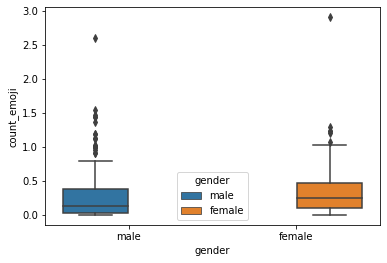

In [732]:
sns.boxplot(data=new, y="count_emoji", x="gender", hue="gender")

<AxesSubplot:xlabel='gender', ylabel='count_token'>

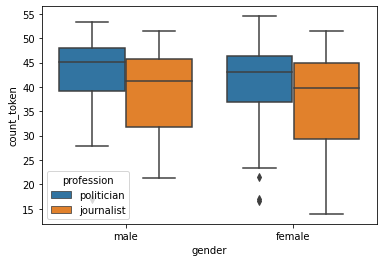

In [730]:
sns.boxplot(data=new, y="count_token", x="gender", hue="profession")

<AxesSubplot:xlabel='profession', ylabel='count_token'>

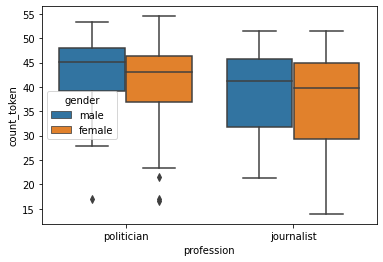

In [665]:
sns.boxplot(data=new, y="count_token", x="profession", hue="gender")

<AxesSubplot:xlabel='profession', ylabel='count_token'>

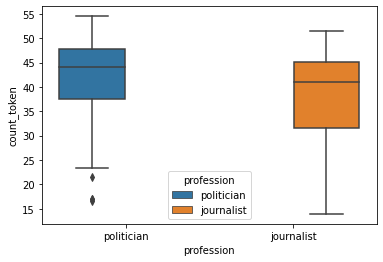

In [666]:
sns.boxplot(data=new, y="count_token", x="profession", hue="profession")

<AxesSubplot:xlabel='ideology_binary', ylabel='count_token'>

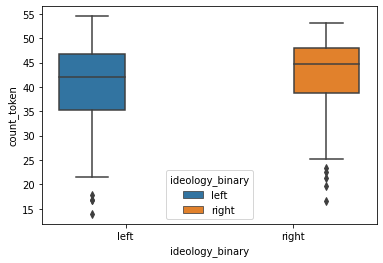

In [668]:
sns.boxplot(data=new, y="count_token", x="ideology_binary", hue="ideology_binary")

<AxesSubplot:xlabel='ideology_multiclass', ylabel='count_token'>

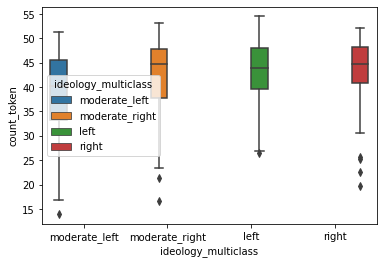

In [670]:
sns.boxplot(data=new, y="count_token", x="ideology_multiclass", hue="ideology_multiclass")

### Modeling 